
# 📈 Lab15 Sensor Calibration

<hr>

## Background

You will develop a function that converts raw ADC samples into distance from the object. Let $n$ be a 14-bit sample from the ADC (0 to 16383) , and $d$ be the distance in mm from the sensor to the object. Then the distance in mm from the sensor to the object is given by

\begin{equation*}
d = \frac{m}{n - c}
\label{eq:dist_vs_adc} \tag{1}
\end{equation*}

where $m$ and $c$ are unknown variables (calibration coefficients) we need to empirically determine. 

```{important}
The goal is to find the calibration coefficients, $m$ and $c$, that give us the best fitting line. 
```


## Procedure

1. **Read this page thoroughly.**  
2. Then, go to Colab by clicking the rocket icon at the top of this page and complete the sensor calibration. **AR means action required in Colab**.

### Record actual distance and ADC values

Now let's collect the ADC samples $N=(n_1, n_2, \dots, n_k)$ for known distances, $D=(d_1, d_2, \dots, d_k)$.  Note that you need to collect the ADC data for distances from the sensors, not the center of the robot.  Place your robot on the paper ruler in the lab as shown in the figure below (the figure may not be displayed in Colab).  Place your robot at 0 cm and place the box of your robot at the desired distances to collect ADC data for the distances between the box and the sensors. 

```{image} ./figures/Lab15_MeasuringDistances.png
:width: 400
:align: center
```
<br>

Record ADC values displayed on the LCD for distances between 80mm and 800mm.  You may need more data at close distances to the wall than at far distances. For example, you want to collect data at distances of $80, 100, ..., 280, 300, 350, 400, ..., 500, 550$, and $800$ mm because your robot will be at a distance less than 300 mm most of the time and there is more noise as the distance becomes larger.   

The more data you collect, the better the fitting line you will have.

Hints:
- Ensure your sensors are mounted straight up and facing the front/right/left.
- Put your sensors at 0mm and place your box at different distances to collect the LCD data.  It would be much easier than putting your box at 0mm and moving around your robot.
- Use the same materials for the calibration and the demo.  For example, if you used a white box for your calibration, use the same box for the demo.  If you use the textbook instead, which is black, you will get different values. The black textbook will absorb some of the IR light. 
- If you have many outliers, you may want to retake the measurements at the distances you have outliers. Usually, the LCD values at 800mm are not quite accurate and you can move on if it is the only outlier. 

**AR**: Update D and N in the following code.

In [1]:
import numpy as np

# distances in mm from the left sensor to the wall
# more data gives you better estimate.
# TODO: Replace the distance values
D = np.array([80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 350, 400, 450, 500, 550, 800])

# samples from the ADC for the distance you collected above.
# TODO: Replace the ADC values
N = np.array((13643, 11490, 9205, 8537, 7722, 6880, 6514, 6146, 5742, 5366, 5084, 4800, 4306, 3923, 3447, 3255, 3066, 2244))


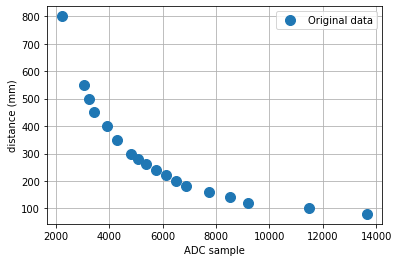

In [2]:
import matplotlib.pyplot as plt

plt.plot(N, D, 'o', label='Original data', markersize=10)
plt.legend()
plt.grid()
plt.xlabel('ADC sample')
plt.ylabel('distance (mm)')
plt.show()

As shown in the figure above, the distance is a nonlinear function of ADC sample. To find a linear function, we can rewrite equation (1) into 

\begin{equation*}
n = m\frac{1}{d} + c
\end{equation*}

Let $d' = 1/d$. Then, we can obtain a linear equation given by

\begin{equation*}
n = m d' + c
\label{eq:adc_vs_invdist} \tag{2}
\end{equation*}

which is a line equation. 

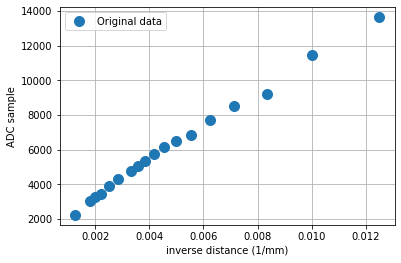

In [3]:
plt.plot(1/D, N, 'o', label='Original data', markersize=10)
plt.legend()
plt.grid()
plt.xlabel('inverse distance (1/mm)')
plt.ylabel('ADC sample')
plt.show()

The above figure shows a linear relationship of the ADC sample and the inverse distance. Now we want to find $m$ and $c$ for the line $n = m d' + c$ that best fits to the data in the figure.


```{note}
The following math is beyond the scope of ECE382. It will be discussed in ECE 487 and may be covered in Math 356/378 (linear regression) or Math 344/360 (linear least squares).  
```

We can rewrite equation (2) in matrix form given by

\begin{equation*}
n = \begin{bmatrix} d' & 1 \end{bmatrix} \begin{bmatrix} m \\ c \end{bmatrix}
\label{eq:adc_vs_invdist_matrix} \tag{3}
\end{equation*}


For multiple ADC samples $(n_1, n_2, \dots, n_k)$, we can obtain

\begin{equation*}
\begin{bmatrix} n_1 \\ n_2 \\ \vdots \\ n_k \end{bmatrix}  = \begin{bmatrix} d'_1 & 1 \\ d'_2 & 1 \\ \vdots & \vdots \\ d'_k & 1 \end{bmatrix} \begin{bmatrix} m \\ c \end{bmatrix}
\end{equation*}

As you may have noticed, it is a system of linear equations, which can be writen in simpler form

\begin{equation*}
\mathbf{N}  = \mathbf{C} \begin{bmatrix} m \\ c \end{bmatrix}
\end{equation*}

where $\mathbf{N} = \begin{bmatrix} n_1 & n_2 & \dots & n_k \end{bmatrix}^\top$ and 

\begin{equation*}
\mathbf{C}  = \begin{bmatrix} d'_1 & 1 \\ d'_2 & 1 \\ \vdots & \vdots \\ d'_k & 1 \end{bmatrix} 
\end{equation*}

As it was mentioned earlier, the goal is to find $m$ and $c$.  Since it is an overdetermined system (more equations than unknowns), we cannot find $m$ and $c$ given by.
\begin{equation*}
\begin{bmatrix} m \\ c \end{bmatrix} = \mathbf{C}^{-1} \mathbf{N}  
\end{equation*}

Since $\mathbf{C}$ is not a square matrix, there exists no inverse of $\mathbf{C}$.  For this case, we need to find the _psedoinverse_ of $\mathbf{C}$ given by

\begin{equation*}
\mathbf{C}^+ = (\mathbf{C}^\top \mathbf{C}) ^{-1}  \mathbf{C}^\top
\end{equation*}

Now we can find $m$ and $c$ by

\begin{equation*}
\begin{bmatrix} m \\ c \end{bmatrix} =  \mathbf{C}^+ \mathbf{N}   = (\mathbf{C}^\top \mathbf{C}) ^{-1}  \mathbf{C}^\top \mathbf{N}  
\end{equation*}

This method is called the least squares estimate (LSE).

Let's create 
\begin{equation*}
\mathbf{C}  = \begin{bmatrix} d'_1 & 1 \\ d'_2 & 1 \\ \vdots & \vdots \\ d'_k & 1 \end{bmatrix} 
\end{equation*}

In [4]:
C = np.vstack([1/D, np.ones(len(D))]).T

We can use `np.linalg.lstsq()` for

\begin{equation*}
\begin{bmatrix} m \\ c \end{bmatrix} =  \mathbf{C}^+ \mathbf{N}   = (\mathbf{C}^\top \mathbf{C}) ^{-1}  \mathbf{C}^\top \mathbf{N}  
\end{equation*}


In [5]:
m, c = np.linalg.lstsq(C, N, rcond=None)[0]
print(f"m={m}, c={c}")

m=992302.9397388729, c=1397.0269781711706


**AR** Record the $m$ and $c$ values for your `IRDistance.c`.  Take the integer values only.

**AR** Rename the title of the  figure and the file name in the following code.

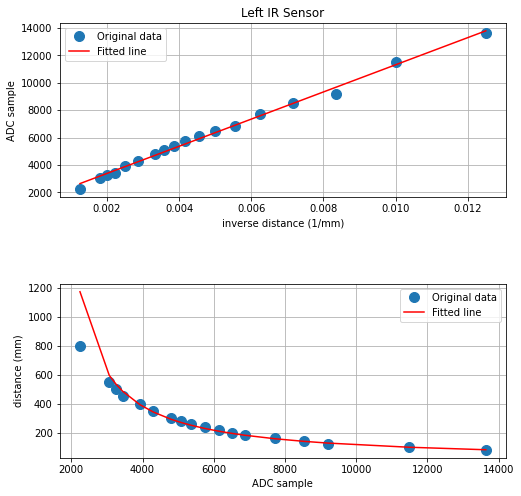

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5)
ax1.set_title("Left IR Sensor")  # Rename the title of figure.
ax1.plot(1/D, N, 'o', label='Original data', markersize=10)
ax1.plot(1/D, m/D + c, 'r', label='Fitted line')
ax1.legend()
ax1.grid()
ax1.set_xlabel('inverse distance (1/mm)')
ax1.set_ylabel('ADC sample')

ax2.plot(N, D, 'o', label='Original data', markersize=10)
ax2.plot(N, m/(N-c), 'r', label='Fitted line')
ax2.legend()
ax2.grid()
ax2.set_xlabel('ADC sample')
ax2.set_ylabel('distance (mm)')

filename = "Lab15_IRCalibLeft.png"  # Rename the file name to save.
plt.savefig(filename) 
plt.show()


**AR** Uncommnet the following lines to download the figure.  You need to submit a figure for each distance sensor.

In [7]:
# import google.colab.files  
# google.colab.files.download(filename) 

## Colab 

To run your code in Colab, click on the rocket icon at the top of this page. ![Colab](https://colab.research.google.com/assets/colab-badge.svg)
